
<!-- Task Title -->

<div style="background-color: #708090; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">**Task 15: Machine Learning (Model Evaluation and Selection II)📈🤖**</h1>
</div>


These exercises will provide hands-on experience with evaluating model performance, handling overfitting and underfitting, and using various metrics for classification problems.


**Deadline: 26 July 2024**

.___ __ __ __ __ __ __ __ __

***@Bytewiseltd***
_______________________________________________________________________________________________________________________________

__________________________________________


<!-- <span style="background-color: #1A237E; color: white; padding: 5px; font-weight: bold; font-family: 'Times New Roman', Times, serif; font-style: italic;">~ Moneka</span> -->

<div style="text-align: right;">
    <span style="background-color: #1A237E; color: white; padding: 5px; font-weight: bold; font-family: 'Times New Roman', Times, serif; font-style: italic;">~ Moneka</span>
</div>

_________________________________________

# **Tasks 📈**

## **Dataset**: **[Adult Income Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data)**

---

### 1. **Applying Cross-Validation to Random Forest Classifier** 📉

**Exercise:**  
- Implement a random forest classifier and evaluate it using k-fold cross-validation.
- Analyze the cross-validation scores to assess the model's stability.

---

### 2. **Investigating Overfitting and Underfitting in Gradient Boosting Machines** 🌲

**Exercise:**  
- Train a gradient boosting classifier with varying numbers of estimators and learning rates.
- Evaluate the model for overfitting and underfitting by comparing training and validation performance.

---

### 3. **Evaluating Precision, Recall, and F1-Score for Random Forests** 📊

**Exercise:**  
- Implement a random forest classifier and calculate precision, recall, and F1-score.
- **Tip:** Discuss the trade-offs between these metrics and their importance for classification tasks.

---

### 4. **ROC Curve and AUC for Gradient Boosting Classifier** 📈

**Exercise:**  
- Implement a gradient boosting classifier and plot the ROC curve.
- Compute the AUC (Area Under the Curve) and interpret how well the model distinguishes between classes.

---

### 5. **Model Performance Comparison with Different Metrics** ⚖️

**Exercise:**  
- Compare the performance of different classifiers (e.g., SVM, random forest, gradient boosting) using cross-validation.
- Evaluate and compare the models based on accuracy, precision, recall, F1-score, and ROC-AUC.

---


---

## **Let's get started!**

**Since this task focuses on evaluation, I'll concentrate solely on that aspect, removing any extraneous details. For a comprehensive analysis on titanic dataset, you can refer to my detailed work in another task available at:**




## Importing Necessary Libraries

In [16]:
# Necessary Libraries/Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold ,StratifiedKFold, GridSearchCV,cross_validate
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

### Data Exploration and Preprocessing


#### Load the dataset

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
           'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
adult_income_df = pd.read_csv(url, names=columns)

#### Overview

In [ ]:
# Basic statistics and information about the dataset

display('Shape of Data:',adult_income_df.shape)
display('Columns:', adult_income_df.columns)
display('Data types:',adult_income_df.dtypes)
display('Preview of data -Head:',adult_income_df.head())
display('Preview of data -Tail:',adult_income_df.tail())
display('Info:',adult_income_df.info())
display('Summary Stats:',adult_income_df.describe())
display('Missing Values:',adult_income_df.isnull().sum())
display('Missing Values (%):',adult_income_df.isnull().sum()/adult_income_df.shape[0]*100)
# display('Unique Values:',adult_income_df.nunique())
display('Duplicate Values:',adult_income_df.duplicated().sum())

'Shape of Data:'

(32561, 15)

'Columns:'

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

'Data types:'

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

'Preview of data -Head:'

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


'Preview of data -Tail:'

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


'Info:'

None

'Summary Stats:'

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


'Missing Values:'

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

'Missing Values (%):'

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education_num     0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
native_country    0.0
income            0.0
dtype: float64

'Duplicate Values:'

24

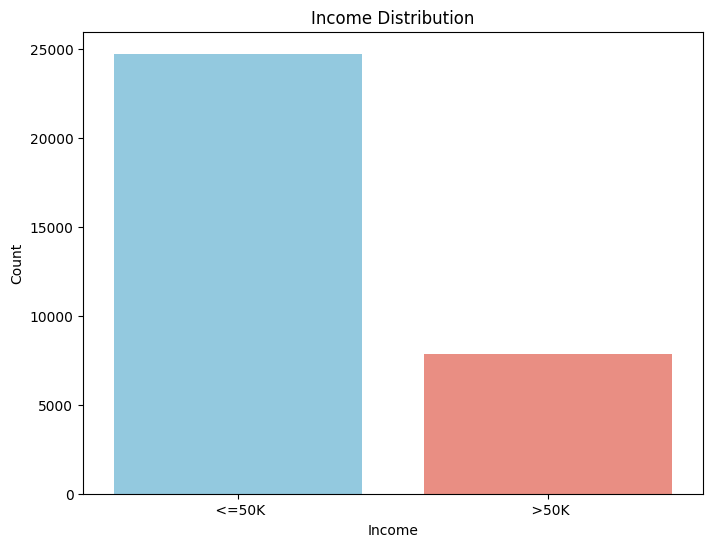

In [ ]:
# Getting the value counts of the 'income' column (target)
income_counts = adult_income_df['income'].value_counts().reset_index()
income_counts.columns = ['income', 'count']

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='income', y='count', data=income_counts, palette=['skyblue', 'salmon'])
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

Currently, we have class imbalance in our dataset, but it is not being addressed.

#### Data Cleaning

In [3]:
# This dataset has some missing values denoted by ?

# Strip any leading/trailing whitespace and replace '?' with NaN
adult_income_df = adult_income_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
adult_income_df.replace('?', np.nan, inplace=True)
# Display the DataFrame after replacement
print("\nDataFrame after replacing '?' with NaN:")
display(adult_income_df.sample(4))


DataFrame after replacing '?' with NaN:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
13441,32,Private,172714,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
1888,22,Self-emp-not-inc,143062,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,40,Greece,<=50K
22803,39,Self-emp-not-inc,106347,Some-college,10,Divorced,Sales,Unmarried,White,Male,0,0,47,United-States,<=50K
5445,32,Private,194141,HS-grad,9,Divorced,Machine-op-inspct,Own-child,White,Male,0,0,50,United-States,<=50K


In [4]:
# Checking for missing values
# print(adult_income_df.isnull().sum())
# Checking for columns with null values
null_val_cols = adult_income_df.columns[adult_income_df.isnull().any()]
null_val_cols

Index(['workclass', 'occupation', 'native_country'], dtype='object')

In [5]:
# Handling missing values
for column in adult_income_df.columns:
    if column in null_val_cols:  # Null values columns
        mode_value = adult_income_df[column].mode()[0]  # Most frequent value
        adult_income_df[column].fillna(mode_value, inplace=True)

In [6]:
# Verifying for missing values
adult_income_df.columns[adult_income_df.isnull().any()]

Index([], dtype='object')

#### Feature Engineering

##### Feature Consolidation / Feature Mapping

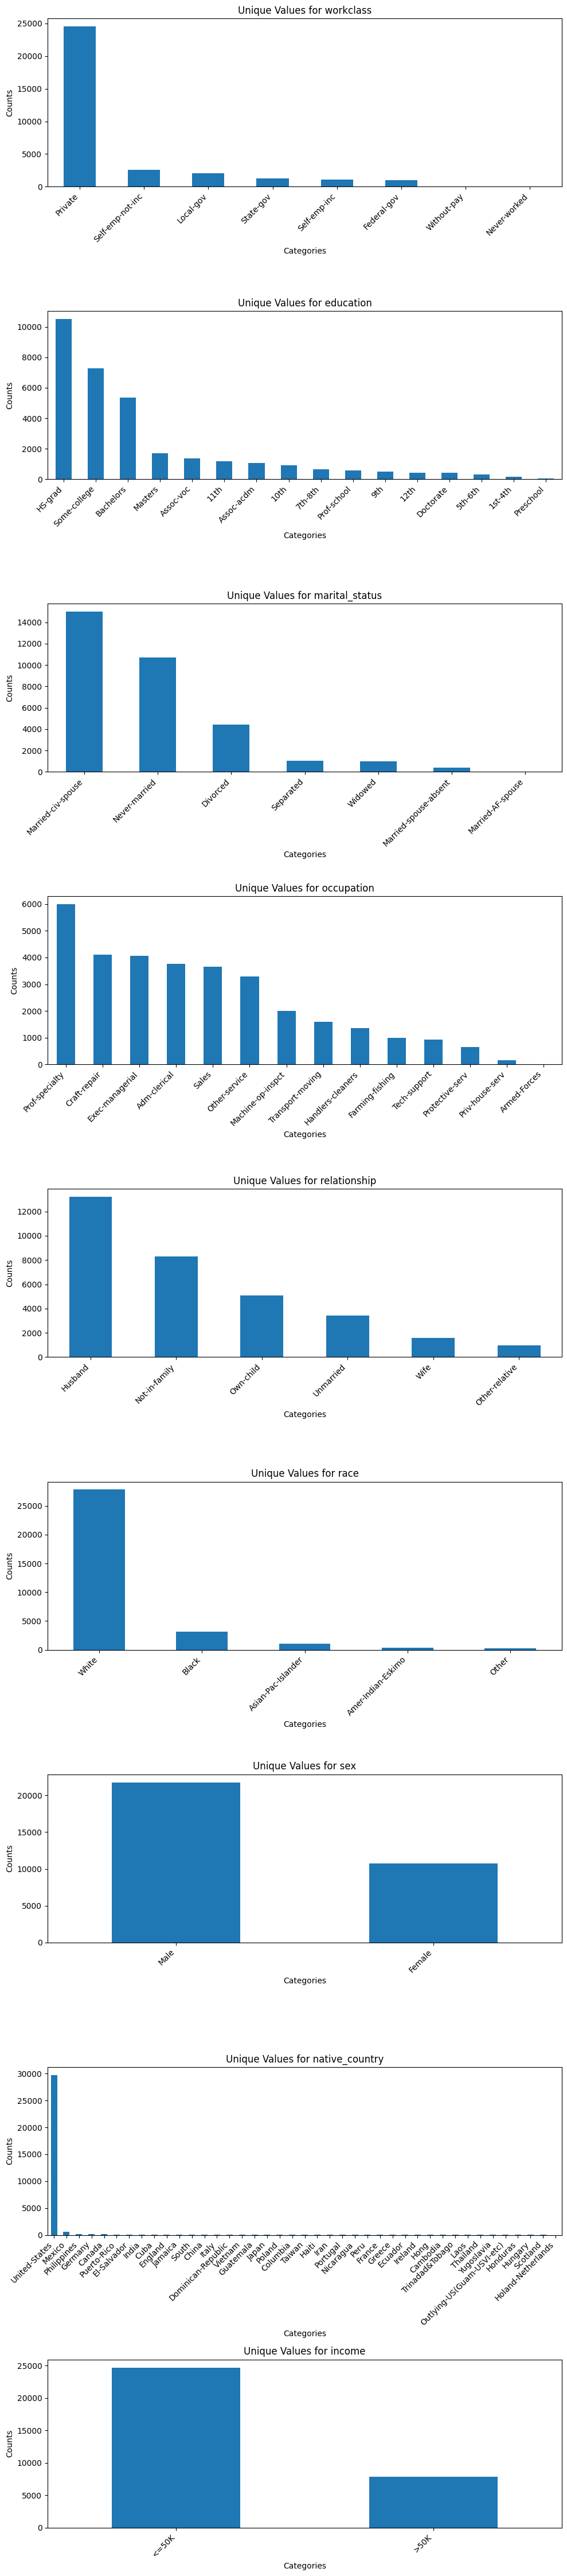

In [ ]:
# Getting columns with object or category data type
object_columns = adult_income_df.select_dtypes(include=['object', 'category']).columns

# Creating a figure and axes for plotting
fig, axes = plt.subplots(nrows=len(object_columns), ncols=1, figsize=(10, 5 * len(object_columns)))
if len(object_columns) == 1:
    axes = [axes]  # Ensure axes is a list for a single subplot

# Plotting unique values for each categorical column
for ax, column in zip(axes, object_columns):
    unique_values = adult_income_df[column].unique()
    value_counts = adult_income_df[column].value_counts()

    # Plot
    value_counts.plot(kind='bar', ax=ax)
    ax.set_title(f'Unique Values for {column}')
    ax.set_xlabel('Categories')
    ax.set_ylabel('Counts')
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [7]:
# Education Category
education_mapping = {
    '11th': 'school',
    'HS-grad': 'high school',
    'Assoc-acdm': 'higher',
    'Some-college': 'higher',
    '10th': 'school',
    'Prof-school': 'higher',
    '7th-8th': 'school',
    'Bachelors': 'undergrad',
    'Masters': 'grad',
    'Doctorate': 'doc',
    '5th-6th': 'school',
    'Assoc-voc': 'higher',
    '9th': 'school',
    '12th': 'school',
    '1st-4th': 'school',
    'Preschool': 'school'
}
adult_income_df['education'] = adult_income_df['education'].map(education_mapping)

In [8]:
# Marital status
adult_income_df['marital_status'] = adult_income_df['marital_status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
adult_income_df['marital_status'] = adult_income_df['marital_status'].replace(['Never-married'], 'not-married')
adult_income_df['marital_status'] = adult_income_df['marital_status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other')

##### Feature Encoding

In [9]:
# Encoding categorical features:

# Initializing an empty dictionary to store LabelEncoder instances
label_encoders = {}

# Iterating over each categorical column in the DataFrame
for column in adult_income_df.select_dtypes(include=['object', 'category']):
    if column != 'income':  # Checking if the column is not 'income'
        # Creating a new LabelEncoder instance for the current column
        le = LabelEncoder()

        # Fitting the encoder on the column data and transform the column into numeric values
        adult_income_df[column] = le.fit_transform(adult_income_df[column])

        # Convert the column data type to int
        adult_income_df[column] = adult_income_df[column].astype(int)

        # Storing the encoder in the dictionary with the column name as the key
        label_encoders[column] = le

# Convert binary categories to numerical values.
adult_income_df['income'] = adult_income_df['income'].map({'<=50K': 0, '>50K': 1})

# Displaying the updated DataFrame with encoded categorical columns
print("Updated DataFrame with encoded categorical columns:")
adult_income_df.head(3)

Updated DataFrame with encoded categorical columns:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,5,13,1,0,1,4,1,2174,0,40,38,0
1,50,5,83311,5,13,0,3,0,4,1,0,0,13,38,0
2,38,3,215646,2,9,2,5,1,4,1,0,0,40,38,0


##### Feature Scaling

In [10]:
# Standardization
scaler = StandardScaler()

# # Columns to standardize
columns_to_standardize = ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']
adult_income_df[columns_to_standardize] = scaler.fit_transform(adult_income_df[columns_to_standardize])

# Verification
adult_income_df.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,6,-1.063611,5,13,1,0,1,4,1,0.148453,-0.21666,-0.035429,38,0
1,0.837109,5,-1.008707,5,13,0,3,0,4,1,-0.145920,-0.21666,-2.222153,38,0
2,-0.042642,3,0.245079,2,9,2,5,1,4,1,-0.145920,-0.21666,-0.035429,38,0


### Data Preparation

In [11]:
# Splitting the data into features (X) and target variable (y)
X = adult_income_df.drop('income', axis=1)
y = adult_income_df['income']

In [12]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

## 1. Applying Cross-Validation to Random Forest Classifier 📉
Exercise:

- Implement a random forest classifier and evaluate it using k-fold cross-validation.
- Analyze the cross-validation scores to assess the model's stability.

In [ ]:
# Implementing Random Forest Classifier

# Initializing Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Applying/Performing K-Fold Cross-Validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Evaluating the model using k-fold cross-validation
# cv_scores = cross_val_score(rfc, X, y, cv=kf, scoring='accuracy')

# # Printing the cross-validation scores
# print(f'KFold Cross-Validation Scores: {cv_scores}')
# print(f'Mean CV Score: {cv_scores.mean()}')
# print(f'Standard Deviation of CV Scores: {cv_scores.std()}')

# Creating a StratifiedKFold instance
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluating the model using Stratified-Fold Cross-Validation (for imbalanced dataset)
cv_scores = cross_val_score(rfc, X, y, cv=skf, scoring='accuracy')

# Printing the cross-validation scores
print(f'StratifiedKFold Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean()}')
print(f'Standard Deviation of CV Scores: {cv_scores.std()}')

StratifiedKFold Cross-Validation Scores: [0.85674804 0.86240786 0.85565111 0.85396192 0.86271499]
Mean CV Score: 0.8582967829225314
Standard Deviation of CV Scores: 0.003594740070067235


In [ ]:
# Optionally, fit the model on the entire dataset and make predictions
rfc.fit(X, y)
predictions = rfc.predict(X)
accuracy = accuracy_score(y, predictions)
print("Accuracy on the entire dataset: ", accuracy)

Accuracy on the entire dataset:  0.9999692884125181



## 2. Investigating Overfitting and Underfitting in Gradient Boosting Machines🌲

- Train a gradient boosting classifier with varying numbers of estimators and learning rates.
- Evaluate the model for overfitting and underfitting by comparing training and validation performance.

Training Gradient Boosting Model with n_estimators=50 and learning_rate=0.01
Training Gradient Boosting Model with n_estimators=50 and learning_rate=0.1
Training Gradient Boosting Model with n_estimators=50 and learning_rate=0.2
Training Gradient Boosting Model with n_estimators=100 and learning_rate=0.01
Training Gradient Boosting Model with n_estimators=100 and learning_rate=0.1
Training Gradient Boosting Model with n_estimators=100 and learning_rate=0.2
Training Gradient Boosting Model with n_estimators=200 and learning_rate=0.01
Training Gradient Boosting Model with n_estimators=200 and learning_rate=0.1
Training Gradient Boosting Model with n_estimators=200 and learning_rate=0.2


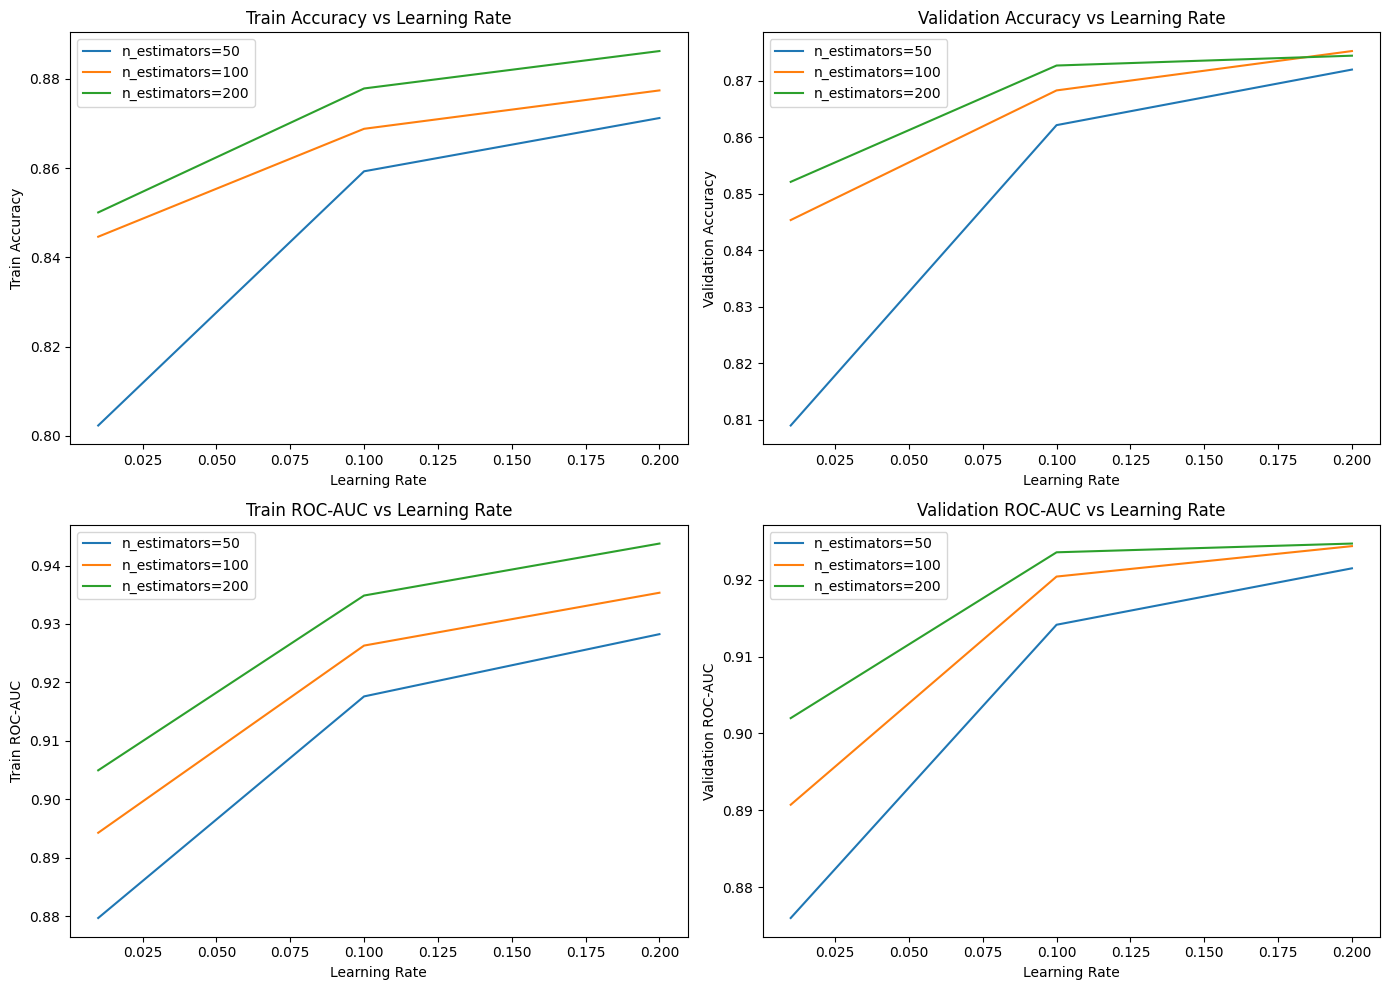

In [ ]:
# # Defining hyperparameter tuning space i.e  parameter ranges / parameter grid
n_estimators_range = [50, 100, 200]
learning_rate_range = [0.01, 0.1, 0.2]

# Initializing lists to store performance metrics
train_accuracies = []
val_accuracies = []
train_roc_auc_scores = []  # Changed variable name to avoid overwriting
val_roc_auc_scores = []   # Changed variable name to avoid overwriting

# Iterating over different parameter combinations
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        print(f"Training Gradient Boosting Model with n_estimators={n_estimators} and learning_rate={learning_rate}")

        # Initializing the model with current parameters
        gbc_model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)

        # Fiting the model
        gbc_model.fit(X_train, y_train)

        # Predicting on training and validation sets
        y_train_pred = gbc_model.predict(X_train)
        y_val_pred = gbc_model.predict(X_val)

        # Calculating accuracy and ROC-AUC scores
        train_accuracy = accuracy_score(y_train, y_train_pred)
        val_accuracy = accuracy_score(y_val, y_val_pred)
        train_roc_auc_score = roc_auc_score(y_train, gbc_model.predict_proba(X_train)[:, 1]) # Changed variable name
        val_roc_auc_score = roc_auc_score(y_val, gbc_model.predict_proba(X_val)[:, 1])  # Changed variable name

        # Storeing metrics
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        train_roc_auc_scores.append(train_roc_auc_score)
        val_roc_auc_scores.append(val_roc_auc_score)

# Reshape lists for easier plotting
train_accuracies = np.array(train_accuracies).reshape(len(n_estimators_range), len(learning_rate_range))
val_accuracies = np.array(val_accuracies).reshape(len(n_estimators_range), len(learning_rate_range))
train_roc_auc = np.array(train_roc_auc_scores).reshape(len(n_estimators_range), len(learning_rate_range))
val_roc_auc = np.array(val_roc_auc_scores).reshape(len(n_estimators_range), len(learning_rate_range))

# Plotting the results
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy plots
for i, n_estimators in enumerate(n_estimators_range):
    ax[0, 0].plot(learning_rate_range, train_accuracies[i], label=f'n_estimators={n_estimators}')
    ax[0, 1].plot(learning_rate_range, val_accuracies[i], label=f'n_estimators={n_estimators}')

# ROC-AUC plots
for i, n_estimators in enumerate(n_estimators_range):
    ax[1, 0].plot(learning_rate_range, train_roc_auc[i], label=f'n_estimators={n_estimators}')
    ax[1, 1].plot(learning_rate_range, val_roc_auc[i], label=f'n_estimators={n_estimators}')

# Labels and titles
ax[0, 0].set_title('Train Accuracy vs Learning Rate')
ax[0, 0].set_xlabel('Learning Rate')
ax[0, 0].set_ylabel('Train Accuracy')
ax[0, 0].legend()

ax[0, 1].set_title('Validation Accuracy vs Learning Rate')
ax[0, 1].set_xlabel('Learning Rate')
ax[0, 1].set_ylabel('Validation Accuracy')
ax[0, 1].legend()

ax[1, 0].set_title('Train ROC-AUC vs Learning Rate')
ax[1, 0].set_xlabel('Learning Rate')
ax[1, 0].set_ylabel('Train ROC-AUC')
ax[1, 0].legend()

ax[1, 1].set_title('Validation ROC-AUC vs Learning Rate')
ax[1, 1].set_xlabel('Learning Rate')
ax[1, 1].set_ylabel('Validation ROC-AUC')
ax[1, 1].legend()

plt.tight_layout()
plt.show()

***Insights:***
- Increasing the learning rate improves both accuracy and ROC-AUC for both training and validation datasets.
- Increasing the number of estimators enhances model performance, as evidenced by higher accuracy and ROC-AUC values.

In [ ]:
# Defining hyperparameter tuning space / grid
param_grid = {
    'n_estimators': n_estimators_range,
    'learning_rate': learning_rate_range

}

# Grid Search
grid_search = GridSearchCV(gbc_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best validation score:", grid_search.best_score_)

# Training a gradient boosting classifier with the best hyperparameters
best_gbc = grid_search.best_estimator_

# Evaluating the model on the training and validation sets
y_train_pred = best_gbc.predict(X_train)
y_val_pred = best_gbc.predict(X_val)

# Training and validation accuracy
print("Training accuracy:", accuracy_score(y_train, y_train_pred))
print("Validation accuracy:", accuracy_score(y_val, y_val_pred))

Best hyperparameters: {'learning_rate': 0.2, 'n_estimators': 200}
Best validation score: 0.8704809864060126
Training accuracy: 0.8862320112320112
Validation accuracy: 0.8743986078411301


## 3. Evaluating Precision, Recall, and F1-Score for Random Forests 📊

- Implement a random forest classifier and calculate precision, recall, and F1-score.
- **Tip:** Discuss the trade-offs between these metrics and their importance for classification tasks.


In [ ]:
# Implementing a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model
rfc.fit(X_train, y_train)
# Predicting on validation set
y_val_pred = rfc.predict(X_val)

# Calculating precision, recall, and F1-score
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Displaying results
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

Precision: 0.7323661830915458
Recall: 0.6326707000864304
F1-Score: 0.6788778112682587

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      7455
           1       0.73      0.63      0.68      2314

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.86      0.85      9769



***Trade-offs and Importance***

There's often a trade-off between Precision and Recall. Increasing one typically decreases the other.

Choosing the right metric depends on the specific problem and its consequences. For instance, in a fraud detection scenario, high recall might be prioritized to identify as many fraudulent cases as possible, even if it means some false positives.


*Precision vs. Recall:*

- Precision focuses on the quality of positive predictions (how many of the predicted positives are true positives), whereas Recall focuses on the quantity of actual positives detected (how many of the true positives are captured).
- In this case, Precision for class 1 is higher than Recall, meaning that when the model predicts class 1, it's relatively accurate, but it's missing many actual instances of class 1.


*F1-Score:*

- The F1-Score balances Precision and Recall. It’s useful when you need to balance the trade-off between Precision and Recall.
Here, the F1-Score (0.68) reflects a compromise between the precision (0.73) and recall (0.63). It’s lower than both metrics, indicating that the trade-off is not perfectly balanced.

***Insights***
- Performance on Class 1:The model performs better in terms of Precision than Recall for class 1, suggesting it’s good at identifying class 1 when it does predict it, but it’s not catching all the actual instances of class 1.
- Class Imbalance:There’s a notable imbalance in support between class 0 (7455 instances) and class 1 (2314 instances). The model performs significantly better for the majority class (class 0) than the minority class (class 1). This imbalance can affect performance metrics.
- Model Improvement: To improve Recall for class 1 without significantly sacrificing Precision, you might need to adjust the decision threshold or use techniques such as resampling (oversampling class 1 or undersampling class 0) or applying different algorithms better suited for imbalanced classes.

***Conclusion***

The metrics indicate that while the model performs well for class 0, it has room for improvement for class 1. The balance between Precision and Recall is not ideal, and the F1-Score reflects this compromise. Addressing class imbalance and fine-tuning the model could help enhance its performance for the minority class.



---
> *Notes:*  
> Precision is critical when the cost of false positives is high (e.g., spam detection).  
> Recall is crucial when the cost of false negatives is high (e.g., medical diagnosis).
> F1-Score provides a single metric that balances both precision and recall, which is useful when you need to balance the trade-off between precision and recall.

## 4. ROC Curve and AUC for Gradient Boosting Classifier 📈

- Implement a gradient boosting classifier and plot the ROC curve.
- Compute the AUC (Area Under the Curve) and interpret how well the model distinguishes between classes.




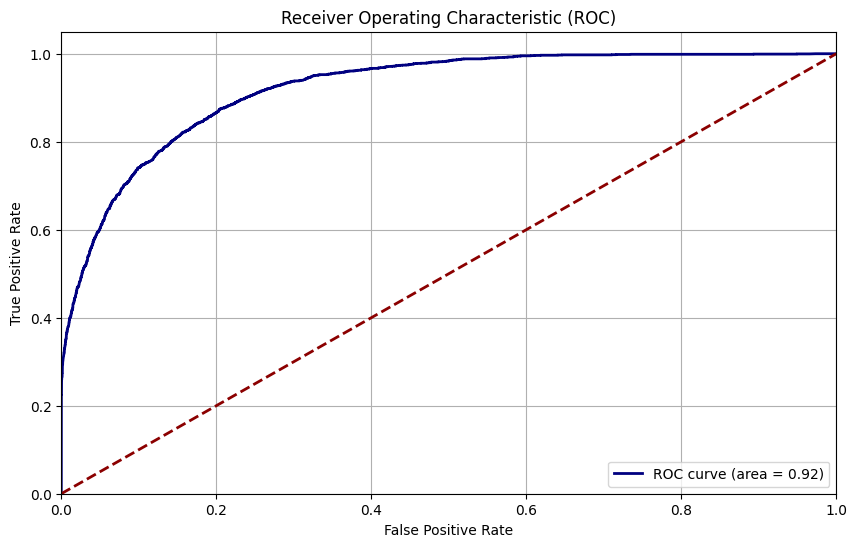


AUC (Area Under the Curve): 0.92


In [ ]:
# Initializing and training the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)

# Predicting probabilities on the validation set
y_val_prob = gbc.predict_proba(X_val)[:, 1]

# Computing ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='navy', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkred', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Printing AUC
print(f'\nAUC (Area Under the Curve): {roc_auc:.2f}')

Plotting: Plot the ROC curve and show the AUC value.


The curve: The blue curve represents the trade-off between the model's ability to correctly identify positive cases (true positive rate) and its tendency to incorrectly identify negative cases as positive (false positive rate) at different threshold values.

Area Under the Curve (AUC): The AUC score is 0.92, which indicates a very good model performance. A higher AUC means better classification performance.

Diagonal Line: The dashed line represents a random classifier, where the true positive rate equals the false positive rate. Models positioned above this line perform better than random guessing.


The ROC curve shows that the model excels at distinguishing between positive and negative cases, and the high AUC score confirms its strong classification capabilities.
The ROC curve provides a graphical representation of the model’s performance across various thresholds.
The AUC indicates the model’s ability to distinguish between positive and negative classes; an AUC of 0.5 represents a model with no discriminative power, while an AUC of 1.0 represents perfect performance.




---
> ***Key Concepts:***  

>- ROC Curve: Shows the trade-off between sensitivity (true positive rate) and specificity (1 - false positive rate). A curve closer to the top-left corner indicates a better-performing model.
- AUC (Area Under the Curve): Quantifies the overall performance of the model. A higher AUC value indicates better model performance in distinguishing between classes. For instance:
>   - AUC > 0.8: Excellent model.  
>   - 0.7 < AUC ≤ 0.8: Good model.  
>   - 0.6 < AUC ≤ 0.7: Fair model.  
>   - AUC ≤ 0.6: Poor model.  

Adjusting the parameters and evaluate the model accordingly for your specific dataset and requirements.

## 5. Model Performance Comparison with Different Metrics ⚖️

- Compare the performance of different classifiers (e.g., SVM, random forest, gradient boosting) using cross-validation.
- Evaluate and compare the models based on accuracy, precision, recall, F1-score, and ROC-AUC.

In [14]:
# Comparing the performance of different classifiers using cross-validation.
# Evaluating metrics

# Initializing classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Defining the evaluation metrics
metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1-score': make_scorer(f1_score),
    'ROC-AUC': make_scorer(roc_auc_score, needs_proba=True)
}

# Cross-validation and evaluation
results = {}

for name, clf in classifiers.items():
    print(f"Evaluating {name}...")

    cv_results = cross_validate(clf, X, y, cv=5, scoring=metrics, return_train_score=False)

    results[name] = {
        'Accuracy': np.mean(cv_results['test_Accuracy']),
        'Precision': np.mean(cv_results['test_Precision']),
        'Recall': np.mean(cv_results['test_Recall']),
        'F1-score': np.mean(cv_results['test_F1-score']),
        'ROC-AUC': np.mean(cv_results['test_ROC-AUC'])
    }

# Displaying results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison of Classifiers:")
display(results_df)

Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating SVM...

Model Performance Comparison of Classifiers:


,Accuracy,Precision,Recall,F1-score,ROC-AUC
Random Forest,0.856024,0.738326,0.623009,0.675745,0.906629
Gradient Boosting,0.865852,0.787088,0.607195,0.685451,0.921226
SVM,0.833175,0.773474,0.434513,0.556409,0.883977


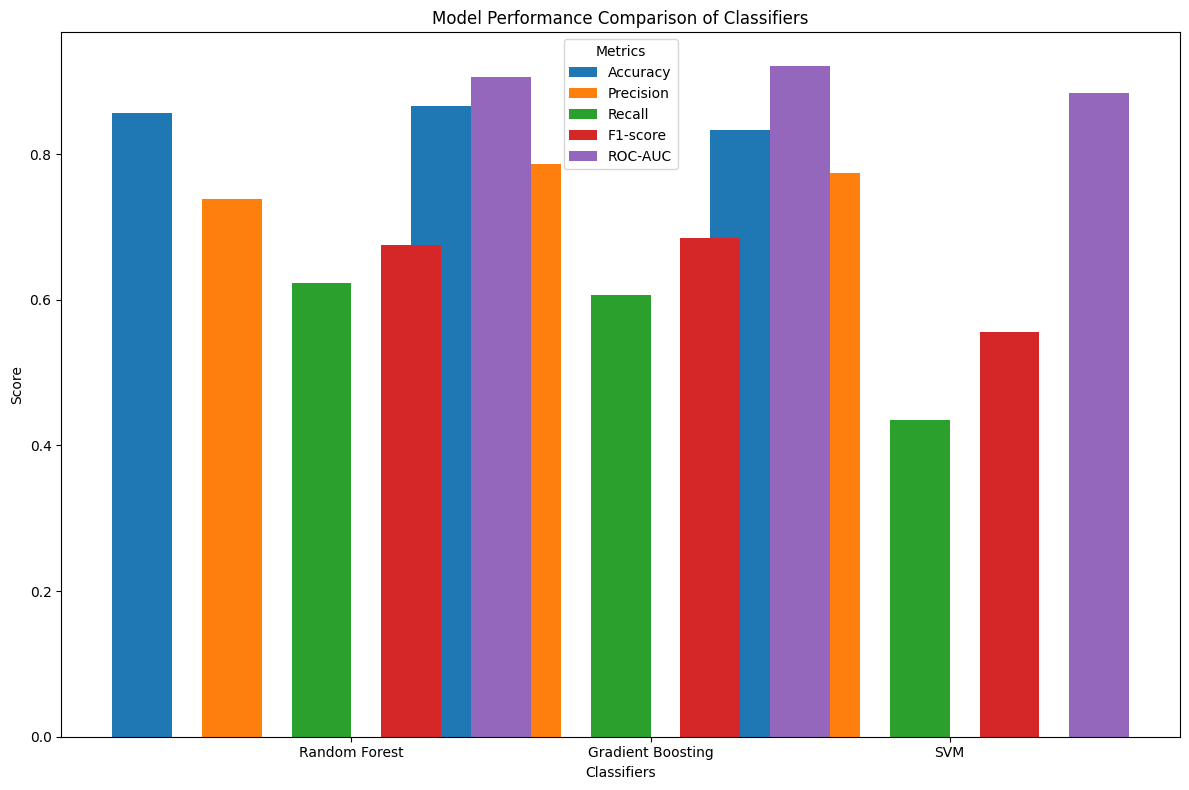

In [18]:
# Plotting the bar chart
metrics = results_df.columns
classifiers = results_df.index
num_classifiers = len(classifiers)
num_metrics = len(metrics)
# num_metrics = len(results_df.columns)
bar_width = 0.2
gap = 0.1  # Gap between groups of bars
# x = np.arange(len(results_df))  # the label locations should correspond to the number of classifiers
x = np.arange(num_classifiers)  # the label locations

fig, ax = plt.subplots(figsize=(12, 8))

for i, metric in enumerate(results_df.columns):
    ax.bar(x + i * (bar_width + gap), results_df[metric], bar_width, label=metric)

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Classifiers')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison of Classifiers')
# ax.set_xticks(x + bar_width * (num_metrics / 2 - 0.5))
ax.set_xticks(x + (num_metrics * bar_width + (num_metrics - 1) * gap) / 2)
# ax.set_xticklabels(results_df.index)
ax.set_xticklabels(classifiers)
ax.legend(title='Metrics')

plt.tight_layout()
plt.show()

***Interpretation of Metrics***

By comparing these metrics, we can determine which classifier performs best for our specific dataset and problem.

- Gradient Boosting performs the best overall, with the highest accuracy, precision, F1-score, and ROC-AUC.
- Random Forest performs well with high recall but has slightly lower precision and F1-score compared to Gradient Boosting.
- SVM has lower performance across most metrics, particularly in recall and F1-score, making it less favorable compared to the other two classifiers.

Based on these results, Gradient Boosting would be the preferred choice if balancing precision and recall with high ROC-AUC is important for your application.







---
> ***Key Concepts:***    
> Accuracy: Overall correctness of the model.   
> Precision: Proportion of positive identifications that were actually correct.
> Recall: Proportion of actual positives that were correctly identified.           
> F1-Score: Harmonic mean of precision and recall.       
> ROC-AUC: Ability of the model to distinguish between classes. A higher AUC value indicates better performance.







---



---

